# Loss Functions

## References 

- https://en.wikipedia.org/wiki/Loss_functions_for_classification
- https://en.wikipedia.org/wiki/Hinge_loss
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote10.html

In [1]:
import numpy as np
from sklearn import metrics

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

## Loss vs Cost Function

\begin{align}
\text{Cost Function } J(h_w(X), y) = \frac{1}{N} \sum_{i=1}^{N} L(h_w(x_i), y_i)
\end{align}

## Classification Loss

### Hinge Loss

\begin{align}
L(h_w(x_i), y_i) = \max(1 - h_w(x_i) y_i, 0)^p
\end{align}

| p | Usecase | 
|-|-|
| p = 1 | SVM |
| p = 2 | Squared Loss SVM |

* Generally used for Standard SVM

In [23]:
def hinge_loss(y_true, y_pred, p):
    return np.power(np.max(np.c_[1 - (y_true * y_pred), np.zeros_like(y_true)], axis=1), p)

Correct classification

In [29]:
hinge_loss(-1, -1, 1), hinge_loss(-1, -1, 2)

(array([0]), array([0]))

Incorrect Classification

In [31]:
hinge_loss(-1, 1, 1), hinge_loss(1, -1, 1)

(array([2]), array([2]))

In [41]:
y_true = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1])
y_pred = np.array([-1, -1, 1, -1, 1, -1, -1, -1, 1])

metrics.hinge_loss(y_pred, y_true), hinge_loss(y_true, y_pred, 1).mean()

(0.4444444444444444, 0.4444444444444444)

In [42]:
metrics.hinge_loss([-1], [-1]), metrics.hinge_loss([-1], [1])

(0.0, 2.0)

### Log Loss

\begin{align}
L(h_w(x_i), y_i) = \log(1 + e^{- y_i  h_w(x_i)})
\end{align}

* Used for Logistic Regression

In [43]:
def logistic_loss(y_true, y_pred):
    return np.log(1 + np.exp(-(y_true * y_pred)))

def log_loss(y_true, y_pred):
    return ((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)))

Correct classification

In [45]:
logistic_loss(-1, -1), logistic_loss(1, 1)

(0.31326168751822286, 0.31326168751822286)

Incorrect Classification

In [46]:
logistic_loss(-1, 1), logistic_loss(1, -1)

(1.3132616875182228, 1.3132616875182228)

In [55]:
y_true = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1])
y_pred = np.array([-1, -1, 1, -1, 1, -1, -1, -1, 1])

logistic_loss(y_true, y_pred).mean()

0.535483909740445

### Exponential Loss

\begin{align}
L(h_w(x_i), y_i) = e^{-h_w(x_i) y_i} 
\end{align}

* Adaboost
* Very aggressive, Loss of misprediction increases exponentially

In [56]:
def exp_loss(y_true, y_pred):
    return np.exp(-(y_pred * y_true))

Correct classification

In [57]:
exp_loss(-1, -1), exp_loss(1, 1)

(0.36787944117144233, 0.36787944117144233)

Incorrect Classification

In [58]:
exp_loss(-1, 1), exp_loss(1, -1)

(2.718281828459045, 2.718281828459045)

In [59]:
y_true = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1])
y_pred = np.array([-1, -1, 1, -1, 1, -1, -1, -1, 1])

exp_loss(y_true, y_pred).mean()

0.8901910827909096

### Zero-One Loss

\begin{align}
L(h_w(x_i), y_i) &= \delta(sign({h_w(x_i)) \ne y_i}) \\ \\
\delta &= \begin{cases} 1 & \text{if } sign(h_w(x_i)) \ne y_i \text{ i.e. missclassification}\\ \\ 0 & \text{otherwise} \end{cases}
\end{align}


* Actual Classification loss

In [60]:
def zero_one_loss(y_true, y_pred):
    return np.int32(np.sign(y_pred) != y_true)

Correct classification

In [61]:
zero_one_loss(-1, -1), zero_one_loss(1, 1)

(0, 0)

Incorrect Classification

In [62]:
zero_one_loss(-1, 1), zero_one_loss(-1, 1)

(1, 1)

In [63]:
y_true = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1])
y_pred = np.array([-1, -1, 1, -1, 1, -1, -1, -1, 1])

zero_one_loss(y_true, y_pred).mean()

0.2222222222222222

### Graphical Representation

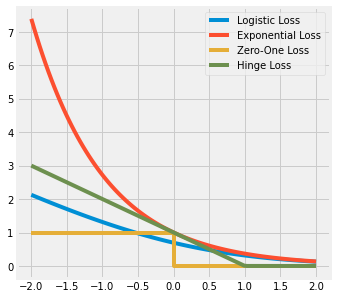

In [70]:
n_samples = 100

x = np.linspace(-2, 2, n_samples)
y = np.ones_like(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(x, logistic_loss(x, y), label='Logistic Loss')
ax.plot(x, exp_loss(x, y), label='Exponential Loss')
ax.plot(np.int32(x), zero_one_loss(y, x), label='Zero-One Loss')
ax.plot(x, hinge_loss(x, y, 1), label='Hinge Loss')

plt.legend()
plt.show()

## Regression Loss

### Squared Loss

\begin{align}
L(h_w(x_i), y_i) &= (h_w(x_i) - y_i)^2
\end{align}

* also known as `Ordinary Least Square`
* estimates mean label
* Differenciable easily
* affected by noisy data

In [17]:
def squared_loss(y_true, y_pred):
    return np.square(y_pred - y_true)

In [72]:
y_true = np.array([12, 11, 10, 12.3, 11.2, 10.3])
y_pred = np.array([11.9, 11, 9.6, 12, 11, 10.1])

squared_loss(y_true, y_pred).mean(), metrics.mean_squared_error(y_true, y_pred)

(0.05666666666666679, 0.05666666666666679)

### Absolute Loss

\begin{align}
L(h_w(x_i), y_i) &= |h_w(x_i) - y_i|
\end{align}


* Estimates median label
* Less sensitive to noise

In [73]:
def absolute_loss(y_true, y_pred):
    return np.abs(y_pred - y_true)

In [74]:
y_true = np.array([12, 11, 10, 12.3, 11.2, 10.3])
y_pred = np.array([11.9, 11, 9.6, 12, 11, 10.1])

absolute_loss(y_true, y_pred).mean(), metrics.mean_absolute_error(y_true, y_pred)

(0.20000000000000018, 0.20000000000000018)

<!-- ### Huber Loss




def huber_loss(y_true, y_pred):
    pass -->

### Graphical Representation

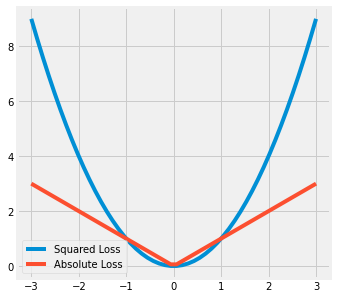

In [84]:
n_samples = 50

x = np.linspace(-3, 3, n_samples)
y = np.zeros_like(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(x, squared_loss(x, y), label='Squared Loss')
ax.plot(x, absolute_loss(x, y), label='Absolute Loss')

plt.legend()
plt.show()